In [1]:
# Import all the required module for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read the csv data
filename = 'Resources/survey_results_public.csv'

df = pd.read_csv(filename, low_memory=False)
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,AIDangerous,AIInteresting,AIResponsible,AIFuture,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,Artificial intelligence surpassing human intel...,Artificial intelligence surpassing human intel...,A governmental or other regulatory body,"I don't care about it, or I haven't thought ab...",I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,Algorithms making important decisions,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old


In [3]:
df.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'JobSearchStatus', 'LastNewJob', 'UpdateCV',
       'Currency', 'SalaryType', 'ConvertedSalary', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Exercise', 'Gender', 'SexualOrientation',
       'EducationParents', 'RaceEthnicity', 'Age'],
      dtype='object')

In [75]:
# Calculating Company Size distribution
company_df = df[['Respondent','CompanySize']].dropna(how='any')
company_group_df = company_df.groupby('CompanySize')
company_size_count_df = company_group_df['CompanySize'].count()
total_responsdent_cs = company_size_count_df.sum()
company_size_percentage_df = (company_group_df['CompanySize'].count()/total_responsdent_cs) * 100
company_size_df = pd.DataFrame({ 'Count': company_size_count_df,
                                 'Percentage': company_size_percentage_df })
company_size_df = company_size_df.sort_values(['Count'], ascending=True)
company_size_df = company_size_df.reset_index(drop=False)

company_size_df

,CompanySize,Count,Percentage
0,"5,000 to 9,999 employees",3017,4.217752
1,500 to 999 employees,4630,6.472718
2,Fewer than 10 employees,7479,10.455607
3,"1,000 to 4,999 employees",7634,10.672296
4,10 to 19 employees,8007,11.193748
5,"10,000 or more employees",9757,13.640240
6,100 to 499 employees,14011,19.587312
7,20 to 99 employees,16996,23.760328


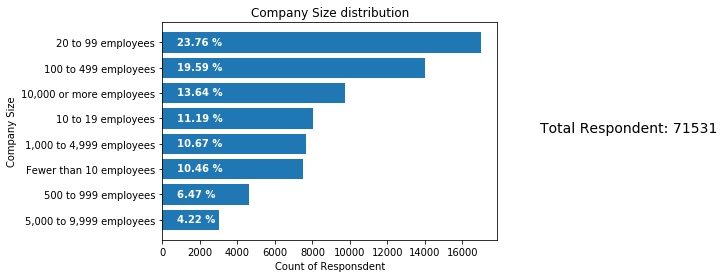

In [82]:
y_axis = np.arange(len(company_size_df))
plt.barh(y_axis, company_size_df['Count'])
plt.yticks(y_axis, company_size_df['CompanySize'], rotation=0, ha='right')
plt.title('Company Size distribution')
plt.ylabel('Company Size')
plt.xlabel('Count of Responsdent')

for i, v in enumerate(company_size_df['Percentage']):
    plt.text(800, i - 0.10 , "{0:.2f} %".format(v), color='white', fontweight='bold')
    
plt.gcf().text(1, 0.5, f'Total Respondent: {total_responsdent_cs}', fontsize=14)

plt.savefig('Images/company-size-distribution.png', bbox_inches='tight')